In [2]:
import sys
sys.path.append('..')

import attack
import data_loader as dl

In [3]:
import geopandas as gp
import pandas as pd
from tqdm import tqdm
import numpy as np
import libpysal
import itertools
from joblib import Parallel, delayed
import random
import matplotlib.pyplot as plt

In [4]:
# Load preprocessed data 
raw_full_trip_gdf, raw_trip_sp_gdf, raw_trip_ep_gdf, tesselation_gdf = dl.load_freemove(min_n_trips_per_user=1, 
                                                                                        hide_test_users=False,
                                                                                       tessellation_diameter=300)
assert len(raw_full_trip_gdf) == len(raw_trip_sp_gdf) == len(raw_trip_ep_gdf)

Reading raw freemove geojson file...
Done.
Number of trajectories in loaded dataset: 1408
Number of users in loaded dataset: 74


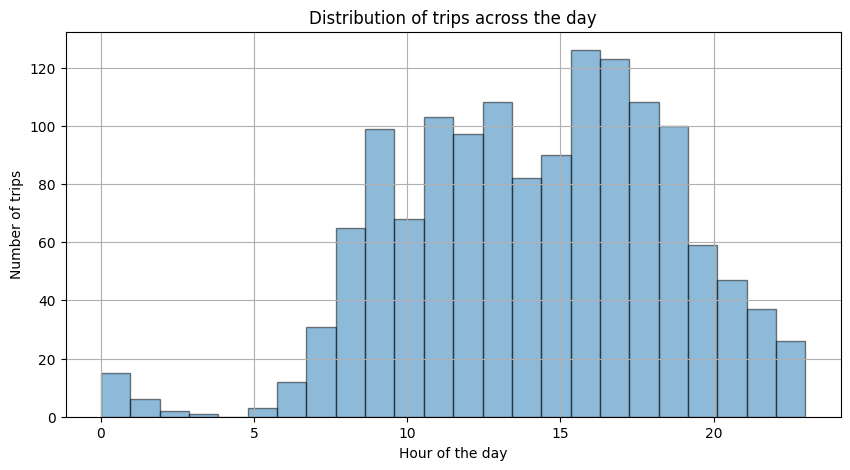

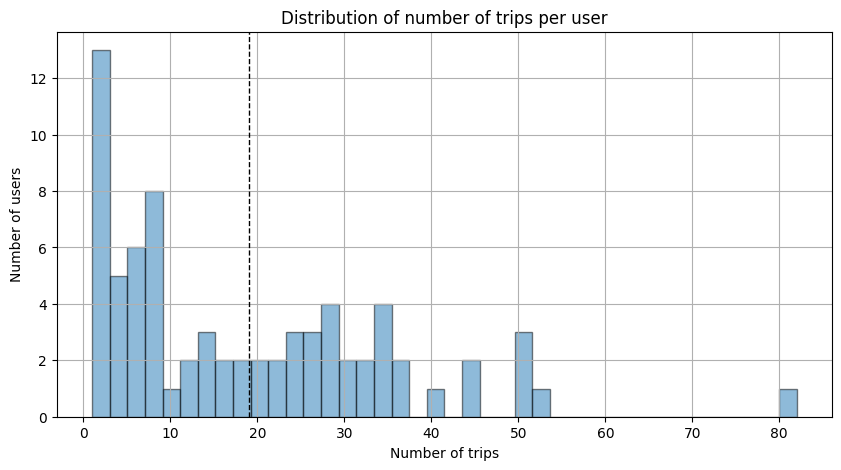

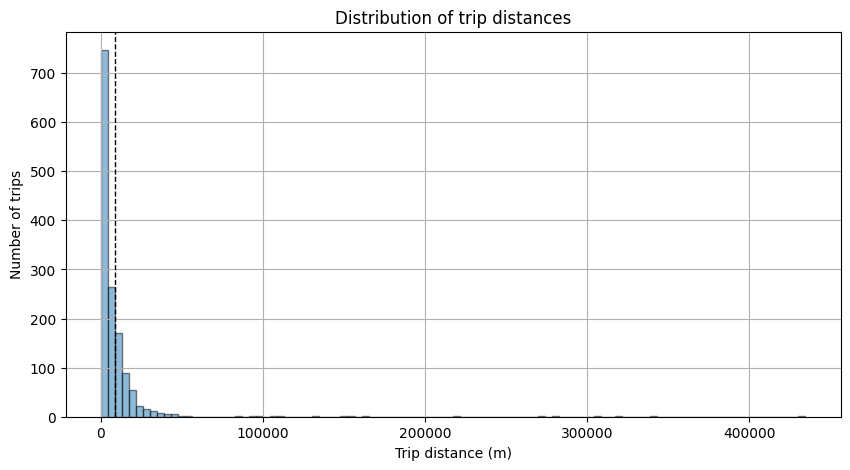

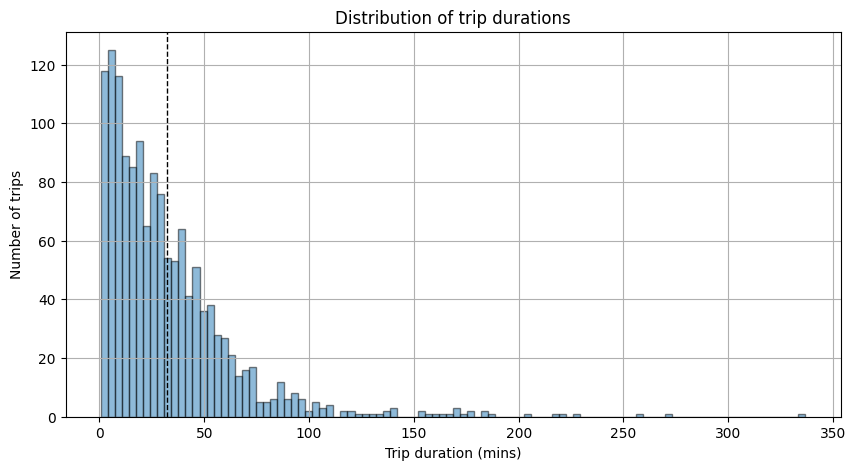


Matching start and end points with tessellation...
Done.

Extracting trips that start and end within tessellation area...
Number of trips that start and end wihin tessellation area: 1375
Number of trips outside and therefore dropped: 33
Done.

Building mapping of trip chains...


100%|███████████████████████████████████████████████████████████████████████████████| 1375/1375 [00:16<00:00, 82.26it/s]


Done.

Evaluating trip chaining...
Number of edges (matched) between trips: 476
Number of wrong matches: 20
Done.

Building trip chains...


100%|████████████████████████████████████████████████████████████████████████████| 1375/1375 [00:00<00:00, 29284.33it/s]


Done.

Merging trips...


100%|██████████████████████████████████████████████████████████████████████████████| 1375/1375 [00:12<00:00, 112.38it/s]


Done.
Number of trips that were matched at least once: 1358/1375
Concatenating MERGED and UNMERGED trips...
Done.

Extracting data for concatenated trips...
Done.

Building clustering after concatenation...
Number of unique clusters: 916
Done.

Building HL from start points...


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 81 disconnected components.
 There are 46 islands with ids: 1, 4, 5, 6, 24, 29, 33, 37, 38, 39, 40, 45, 46, 47, 48, 49, 57, 58, 59, 70, 84, 91, 92, 96, 98, 99, 102, 103, 113, 114, 115, 117, 118, 119, 120, 123, 137, 138, 158, 159, 178, 179, 182, 185, 186, 198.
  warnings.warn(message)


Done.

Building HL from end points...


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 124 disconnected components.
 There are 51 islands with ids: 4, 23, 37, 50, 51, 52, 53, 59, 60, 98, 115, 116, 126, 127, 129, 130, 132, 136, 148, 150, 156, 157, 158, 167, 199, 200, 203, 218, 225, 226, 239, 241, 244, 245, 262, 263, 269, 300, 302, 317, 318, 321, 329, 347, 355, 357, 387, 392, 406, 414, 422.
  warnings.warn(message)
/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 147 disconnected components.
 There are 59 islands with ids: 7, 68, 106, 144, 145, 147, 154, 155, 204, 238, 239, 246, 247, 259, 265, 273, 276, 291, 292, 295, 306, 313, 322, 323, 326, 337, 356, 357, 367, 368, 369, 370, 383, 390, 391, 408, 409, 420, 421, 437, 463, 468, 472, 474, 482, 484, 485, 497, 498, 531, 532, 537, 538, 543, 557, 564, 573, 592, 613.
  warnings.warn(message)


Done.

Combining HL from start points and end points...
Number of users for which at least on Home Location has been identified:  66
Number of unique HL tiles: 147
Done.

Matching trips to HL...
Number of unmatched trajectories (concatenated) that do neither start nor end in a HL tile: 87/916
Number of trajectories (concatenated) that start AND end in a HL tile: 487/916
Number of trips that match different HL tiles with their SP and EP: 240
Done.

Matching double assigned trips to unique HL...


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.
[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-4)]: Done 480 out of 480 | elapsed:  1.2min finished
[Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


All scores are 0.0, assigning -1 as best_hl_id!
All scores are 0.0, assigning -1 as best_hl_id!
Done.

Getting trajectories that happened during the same time...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-4)]: Done 550 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-4)]: Done 916 out of 916 | elapsed:  2.1min finished


Done.

Building clustering after HL matching step...


 12%|██████████▏                                                                       | 12/97 [00:00<00:00, 114.51it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 400 iterations with 109 trajectories...


[Parallel(n_jobs=-4)]: Done 400 out of 400 | elapsed:    0.6s finished
 25%|████████████████████▌                                                              | 24/97 [00:00<00:03, 23.92it/s]

Done. Length of longest subset:  30


 43%|███████████████████████████████████▉                                               | 42/97 [00:01<00:01, 41.99it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 400 iterations with 46 trajectories...


[Parallel(n_jobs=-4)]: Done 400 out of 400 | elapsed:    0.5s finished
 58%|███████████████████████████████████████████████▉                                   | 56/97 [00:01<00:01, 31.62it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Done. Length of longest subset:  28
Running randomized subset search for 400 iterations with 44 trajectories...


[Parallel(n_jobs=-4)]: Done 400 out of 400 | elapsed:    0.5s finished
 72%|███████████████████████████████████████████████████████████▉                       | 70/97 [00:02<00:00, 27.16it/s]

Done. Length of longest subset:  33


100%|███████████████████████████████████████████████████████████████████████████████████| 97/97 [00:02<00:00, 35.23it/s]


Done.

Clustering results after concatenation step:
Number of unique clusters: 916
Homogeneity: 0.995
Completeness: 0.585
V-measure: 0.736
Rand index: 0.978
ARI: 0.058
MI: 3.911
NMI: 0.736
AMI: 0.263
Cluster accuracy: 0.145

Clustering results after HL matching step:
Number of unique clusters: 307
Homogeneity: 0.887
Completeness: 0.724
V-measure: 0.797
Rand index: 0.982
ARI: 0.484
MI: 3.490
NMI: 0.797
AMI: 0.658
Cluster accuracy: 0.550

Assigning trips without match...
Comparing trips that were not assigned to any HL_ID with trips that were assigned to a HL_ID...


  0%|                                                                                           | 0/212 [00:00<?, ?it/s]

There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 108.0, 117.0, 132.0, 143.0]


  0%|▍                                                                                  | 1/212 [00:11<39:58, 11.37s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 308 to trips 89 159


  1%|▊                                                                                | 2/212 [00:44<1:24:29, 24.14s/it]

existing match and assign cluster id 48.0 to trip 524
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 54.0, 130.0]


  1%|█▏                                                                               | 3/212 [00:53<1:00:01, 17.23s/it]

Found best HL_ID after comparing candidates: 130.0
existing match and assign cluster id 130.0 to trip 26


  2%|█▌                                                                               | 4/212 [01:50<1:53:43, 32.80s/it]

existing match and assign cluster id 70.0 to trip 268
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [81.0, 108.0]


  2%|█▉                                                                               | 5/212 [04:13<4:10:58, 72.75s/it]

Found best HL_ID after comparing candidates: 108.0
existing match and assign cluster id 108.0 to trip 44


  3%|██▎                                                                              | 6/212 [05:38<4:23:56, 76.88s/it]

LCSS scores too low to match


  3%|██▋                                                                              | 7/212 [06:28<3:52:18, 67.99s/it]

LCSS scores too low to match


  4%|███                                                                              | 8/212 [06:52<3:04:04, 54.14s/it]

existing match and assign cluster id 47.0 to trip 283


  4%|███▍                                                                             | 9/212 [07:59<3:16:50, 58.18s/it]

existing match and assign cluster id 87.0 to trip 665


  5%|███▊                                                                            | 10/212 [08:30<2:47:08, 49.64s/it]

LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


  5%|████▏                                                                           | 11/212 [08:59<2:24:46, 43.22s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 1306


  6%|████▌                                                                           | 12/212 [09:45<2:27:30, 44.25s/it]

existing match and assign cluster id 132.0 to trip 34
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 130.0]


  6%|████▉                                                                           | 13/212 [10:42<2:39:24, 48.07s/it]

Found best HL_ID after comparing candidates: 130.0
existing match and assign cluster id 130.0 to trip 25


  7%|█████▎                                                                          | 14/212 [12:12<3:19:57, 60.59s/it]

trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match


  7%|█████▋                                                                          | 15/212 [13:10<3:16:29, 59.85s/it]

existing match and assign cluster id 39.0 to trip 507


  8%|██████                                                                          | 16/212 [15:42<4:46:50, 87.81s/it]

trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 109.0 to trip 1027
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


  8%|██████▍                                                                         | 17/212 [16:36<4:11:40, 77.44s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 309 to trips 1397 114
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 2.0]


  8%|██████▋                                                                        | 18/212 [19:13<5:27:30, 101.29s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 310 to trips 152 1188


  9%|███████▏                                                                        | 19/212 [20:14<4:47:26, 89.36s/it]

existing match and assign cluster id 108.0 to trip 386
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 117.0]


  9%|███████▌                                                                        | 20/212 [21:09<4:12:36, 78.94s/it]

Found best HL_ID after comparing candidates: 117.0
existing match and assign cluster id 117.0 to trip 1185
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [82.0, 108.0]


 10%|███████▉                                                                        | 21/212 [21:12<2:59:03, 56.25s/it]

Found best HL_ID after comparing candidates: 82.0
existing match and assign cluster id 82.0 to trip 634


 10%|████████▎                                                                       | 22/212 [21:38<2:29:06, 47.09s/it]

LCSS scores too low to match


 11%|████████▋                                                                       | 23/212 [21:58<2:02:54, 39.02s/it]

existing match and assign cluster id 47.0 to trip 282
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 11%|█████████                                                                       | 24/212 [22:14<1:40:31, 32.08s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 8.0 to trip 810


 12%|█████████▊                                                                      | 26/212 [22:26<1:02:17, 20.09s/it]

existing match and assign cluster id 94.0 to trip 947


 13%|██████████▏                                                                     | 27/212 [23:07<1:18:01, 25.30s/it]

trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 81.0 to trip 674
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 76.0, 101.0]
Found best HL_ID after comparing candidates: 76.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 76.0, 101.0]
Found best HL_ID after comparing candidates: 76.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 76.0, 101.0]


 13%|██████████▌                                                                     | 28/212 [23:34<1:18:45, 25.68s/it]

Found best HL_ID after comparing candidates: 76.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match


 14%|██████████▉                                                                     | 29/212 [23:56<1:15:26, 24.74s/it]

trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match


 14%|███████████▎                                                                    | 30/212 [24:38<1:29:14, 29.42s/it]

LCSS scores too low to match


 15%|███████████▋                                                                    | 31/212 [24:59<1:21:23, 26.98s/it]

LCSS scores too low to match


 15%|████████████                                                                    | 32/212 [25:16<1:12:49, 24.28s/it]

LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 26.0, 28.0, 41.0, 77.0, 79.0, 81.0, 82.0, 108.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 26.0, 28.0, 41.0, 77.0, 79.0, 81.0, 82.0, 108.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 26.0, 28.0, 41.0, 77.0, 79.0, 81.0, 82.0, 108.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 26.0, 28.0, 41.0, 7

 16%|████████████▍                                                                   | 33/212 [25:37<1:09:31, 23.30s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match


 16%|████████████▊                                                                   | 34/212 [26:00<1:08:29, 23.09s/it]

existing match and assign cluster id 23.0 to trip 240


 17%|█████████████▏                                                                  | 35/212 [26:15<1:00:55, 20.65s/it]

existing match and assign cluster id 66.0 to trip 672
trip overlaps in time with other trips in the same HL_ID
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 57.0]


 17%|█████████████▉                                                                    | 36/212 [26:22<48:50, 16.65s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 311 to trips 1218 267
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0]


 17%|██████████████▎                                                                   | 37/212 [26:48<56:38, 19.42s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0]


 18%|██████████████▎                                                                 | 38/212 [27:14<1:02:32, 21.56s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 312 to trips 74 87
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312]


 18%|███████████████                                                                   | 39/212 [27:21<49:24, 17.14s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312]


 19%|███████████████▍                                                                  | 40/212 [27:51<59:51, 20.88s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 313 to trips 72 92
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312, 313]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312, 313]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312, 313]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312, 313]


 19%|███████████████▊                                                                  | 41/212 [27:59<48:35, 17.05s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312, 313]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312, 313]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312, 313]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 3

 20%|████████████████▏                                                                 | 42/212 [28:15<47:56, 16.92s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 312, 313]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 312, 313]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 312, 313]


 20%|████████████████▏                                                               | 43/212 [29:22<1:29:43, 31.86s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 115.0 to trip 63
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 115.0, 312, 313]


 21%|████████████████▌                                                               | 44/212 [29:25<1:05:04, 23.24s/it]

Found best HL_ID after comparing candidates: 115.0
existing match and assign cluster id 115.0 to trip 95
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [34.0, 58.0]


 21%|████████████████▉                                                               | 45/212 [30:31<1:39:55, 35.90s/it]

Found best HL_ID after comparing candidates: 34.0
existing match and assign cluster id 34.0 to trip 1305
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [32.0, 34.0, 66.0, 310]


 22%|█████████████████▎                                                              | 46/212 [31:23<1:53:14, 40.93s/it]

Found best HL_ID after comparing candidates: 310
existing match and assign cluster id 310 to trip 174


 22%|█████████████████▋                                                              | 47/212 [32:33<2:16:11, 49.53s/it]

LCSS scores too low to match


 23%|██████████████████                                                              | 48/212 [34:10<2:54:12, 63.73s/it]

existing match and assign cluster id 128.0 to trip 1015
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 2.0]


 23%|██████████████████▍                                                             | 49/212 [35:51<3:23:55, 75.07s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 314 to trips 727 145
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [54.0, 130.0]


 24%|██████████████████▊                                                             | 50/212 [36:01<2:29:16, 55.29s/it]

Found best HL_ID after comparing candidates: 130.0
existing match and assign cluster id 130.0 to trip 17


 24%|███████████████████▏                                                            | 51/212 [36:16<1:56:09, 43.29s/it]

LCSS scores too low to match


 25%|████████████████████                                                            | 53/212 [37:18<1:39:46, 37.65s/it]

trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 130.0 to trip 1049


 25%|████████████████████▍                                                           | 54/212 [37:26<1:19:46, 30.29s/it]

existing match and assign cluster id 29.0 to trip 1186
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [34.0, 58.0]


 26%|████████████████████▊                                                           | 55/212 [38:40<1:49:17, 41.77s/it]

Found best HL_ID after comparing candidates: 34.0
existing match and assign cluster id 34.0 to trip 190
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]


 26%|█████████████████████▏                                                          | 56/212 [38:48<1:24:20, 32.44s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]


 27%|█████████████████████▌                                                          | 57/212 [38:56<1:06:25, 25.71s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 26.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 26.0]


 27%|█████████████████████▉                                                          | 58/212 [39:44<1:22:11, 32.02s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 34.0, 77.0]


 28%|██████████████████████▎                                                         | 59/212 [39:51<1:03:18, 24.83s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match


 28%|██████████████████████▋                                                         | 60/212 [40:48<1:26:55, 34.31s/it]

existing match and assign cluster id 33.0 to trip 954


 29%|███████████████████████                                                         | 61/212 [41:36<1:36:19, 38.28s/it]

existing match and assign cluster id 115.0 to trip 822
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 81.0]


 29%|███████████████████████▍                                                        | 62/212 [42:03<1:27:31, 35.01s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 315 to trips 1205 1210
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 315]


 30%|████████████████████████▏                                                       | 64/212 [43:12<1:25:23, 34.62s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 316 to trips 1220 1207
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [72.0, 81.0, 117.0, 315, 316]


 31%|█████████████████████████▌                                                        | 66/212 [43:21<55:39, 22.87s/it]

Found best HL_ID after comparing candidates: 117.0
existing match and assign cluster id 117.0 to trip 1215


 32%|█████████████████████████▎                                                      | 67/212 [44:00<1:03:53, 26.44s/it]

no match and assign new cluster id 317 to trips 58 755


 32%|██████████████████████████▎                                                       | 68/212 [44:19<58:37, 24.42s/it]

existing match and assign cluster id 22.0 to trip 418
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 34.0, 65.0, 80.0, 86.0, 98.0, 101.0, 112.0, 115.0, 119.0, 143.0, 308, 309]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 34.0, 65.0, 80.0, 86.0, 98.0, 101.0, 112.0, 115.0, 119.0, 143.0, 308, 309]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 34.0, 65.0, 80.0, 86.0, 98.0, 101.0, 112.0, 115.0, 119.0, 143.0, 308, 309]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips i

 33%|███████████████████████████                                                       | 70/212 [44:38<43:42, 18.47s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 34.0, 80.0, 98.0, 101.0, 112.0, 115.0, 119.0, 308, 309]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 34.0, 80.0, 98.0, 101.0, 112.0, 115.0, 119.0, 308, 309]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 34.0, 80.0, 98.0, 101.0, 112.0, 115.0, 119.0, 308, 309]
Found best HL_ID after comparing candidates: -1.0
trip overlaps i

 33%|███████████████████████████▍                                                      | 71/212 [45:00<45:28, 19.35s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 143.0 to trip 374
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 80.0, 101.0, 112.0, 115.0, 119.0, 143.0, 309]


 34%|███████████████████████████▊                                                      | 72/212 [45:10<39:52, 17.09s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 318 to trips 1395 148
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 309, 318]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 309, 318]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 309, 318]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 309, 3

 34%|███████████████████████████▌                                                    | 73/212 [46:11<1:05:16, 28.18s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 34.0, 65.0, 80.0, 86.0, 98.0, 101.0, 112.0, 115.0, 119.0, 143.0, 308, 309, 318]


 35%|████████████████████████████▌                                                     | 74/212 [46:15<50:04, 21.77s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 319 to trips 1396 375
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 80.0, 98.0, 101.0, 112.0, 115.0, 119.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 80.0, 98.0, 101.0, 112.0, 115.0, 119.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 30.0, 80.0, 98.0, 101.0, 112.0, 115.0, 119.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with

 35%|█████████████████████████████                                                     | 75/212 [46:49<57:21, 25.12s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 34.0 to trip 186
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score

 36%|████████████████████████████▋                                                   | 76/212 [47:31<1:07:41, 29.86s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 112.0 to trip 151


 36%|█████████████████████████████                                                   | 77/212 [50:06<2:28:57, 66.20s/it]

LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 1.0, 58.0, 135.0, 310, 314]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 1.0, 58.0, 135.0, 310, 314]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 1.0, 58.0, 135.0, 310, 314]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 1.0, 58.0, 135.0, 310, 314]
Found best HL_ID after comparing candidates: -1.0
trip

 37%|█████████████████████████████▊                                                  | 79/212 [50:12<1:23:21, 37.61s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 58.0, 135.0, 310, 314]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 58.0, 135.0, 310, 314]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 58.0, 135.0, 310, 314]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_ID

 38%|██████████████████████████████▏                                                 | 80/212 [50:21<1:07:05, 30.50s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match


 38%|███████████████████████████████▎                                                  | 81/212 [50:33<56:23, 25.83s/it]

existing match and assign cluster id 77.0 to trip 19


 39%|██████████████████████████████▉                                                 | 82/212 [51:29<1:13:44, 34.03s/it]

existing match and assign cluster id 34.0 to trip 239


 39%|████████████████████████████████                                                  | 83/212 [51:41<59:50, 27.84s/it]

existing match and assign cluster id 77.0 to trip 673


 40%|███████████████████████████████▋                                                | 84/212 [52:55<1:27:20, 40.94s/it]

LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [77.0, 93.0]
Found best HL_ID after comparing candidates: 77.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [77.0, 93.0]
Found best HL_ID after comparing candidates: 77.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 80.0, 100.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 80.0, 100.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more

 40%|████████████████████████████████                                                | 85/212 [53:02<1:06:03, 31.21s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 101.0 to trip 833
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 41%|█████████████████████████████████▎                                                | 86/212 [53:21<57:41, 27.47s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 942


 41%|████████████████████████████████▊                                               | 87/212 [54:28<1:21:38, 39.19s/it]

existing match and assign cluster id 123.0 to trip 66
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [30.0, 67.0, 83.0]


 42%|█████████████████████████████████▏                                              | 88/212 [54:41<1:05:05, 31.50s/it]

Found best HL_ID after comparing candidates: 30.0
existing match and assign cluster id 30.0 to trip 1346


 42%|█████████████████████████████████▌                                              | 89/212 [58:28<3:03:33, 89.54s/it]

no match and assign new cluster id 320 to trips 1217 422


 42%|█████████████████████████████████                                             | 90/212 [1:00:17<3:13:53, 95.36s/it]

trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 48.0 to trip 175


 43%|█████████████████████████████████▍                                            | 91/212 [1:00:59<2:40:15, 79.47s/it]

trip overlaps in time with other trips in the same HL_ID
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 18.0, 28.0, 30.0, 57.0, 63.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 18.0, 28.0, 30.0, 57.0, 63.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 18.0, 28.0, 30.0, 57.0, 63.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS

 43%|█████████████████████████████████▊                                            | 92/212 [1:01:15<2:00:47, 60.40s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 34.0 to trip 273


 44%|██████████████████████████████████▏                                           | 93/212 [1:02:06<1:54:08, 57.55s/it]

existing match and assign cluster id 28.0 to trip 787
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 63.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 63.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 63.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 63.0, 146.0]
Found best HL_ID after comparing candidat

 44%|██████████████████████████████████▌                                           | 94/212 [1:02:19<1:27:02, 44.26s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 18.0 to trip 819
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]


 45%|██████████████████████████████████▉                                           | 95/212 [1:02:42<1:13:57, 37.93s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 500
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 77.0]


 45%|███████████████████████████████████▎                                          | 96/212 [1:05:05<2:14:14, 69.43s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 1316
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 61.0]


 46%|███████████████████████████████████▋                                          | 97/212 [1:07:50<3:07:48, 97.99s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 1031
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 46%|███████████████████████████████████▌                                         | 98/212 [1:09:54<3:21:05, 105.83s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 368
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 57.0, 112.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 57.0, 112.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 57.0, 112.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS

 47%|███████████████████████████████████▉                                         | 99/212 [1:16:18<5:56:23, 189.24s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 309 to trip 329
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS 

 47%|███████████████████████████████████▊                                        | 100/212 [1:17:55<5:01:40, 161.61s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 34.0 to trip 162
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 318, 319]


 48%|████████████████████████████████████▏                                       | 101/212 [1:19:13<4:12:22, 136.42s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 222
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 48%|████████████████████████████████████▌                                       | 102/212 [1:21:14<4:01:39, 131.81s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 30.0 to trip 380
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]
Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 49%|████████████████████████████████████▉                                       | 103/212 [1:22:26<3:26:52, 113.88s/it]

Found best HL_ID after comparing candidates: -1.0
trip overlaps in time with other trips in the same HL_ID
trip overlaps in time with other trips in the same HL_ID
LCSS scores too low to match


 49%|█████████████████████████████████████▎                                      | 104/212 [1:24:09<3:19:32, 110.86s/it]

existing match and assign cluster id 57.0 to trip 40
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 30.0, 34.0]


 50%|██████████████████████████████████████▏                                      | 105/212 [1:24:40<2:34:29, 86.63s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 355
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0]


 50%|██████████████████████████████████████▌                                      | 106/212 [1:25:42<2:20:28, 79.51s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 801
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]


 50%|██████████████████████████████████████▎                                     | 107/212 [1:28:20<3:00:11, 102.97s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 81
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 30.0]


 51%|███████████████████████████████████████▏                                     | 108/212 [1:29:33<2:42:49, 93.94s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 708
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 112.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 112.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 112.0, 143.0, 309, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS sc

 51%|███████████████████████████████████████▌                                     | 109/212 [1:30:46<2:30:36, 87.74s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 80.0 to trip 396
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candi

 52%|███████████████████████████████████████▍                                    | 110/212 [1:33:08<2:56:40, 103.93s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 317 to trip 266
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 52%|████████████████████████████████████████▎                                    | 111/212 [1:33:59<2:27:58, 87.90s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 18.0 to trip 297
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 18.0, 28.0, 34.0]


 53%|████████████████████████████████████████▋                                    | 112/212 [1:36:05<2:45:52, 99.52s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 1385
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 28.0, 32.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 28.0, 32.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 28.0, 32.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 28.0, 32.0, 34.0

 53%|████████████████████████████████████████▌                                   | 113/212 [1:40:12<3:56:55, 143.59s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 9.0 to trip 192
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest

 54%|█████████████████████████████████████████▊                                   | 115/212 [1:40:54<2:20:55, 87.17s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 63.0 to trip 488
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS

 55%|█████████████████████████████████████████▌                                  | 116/212 [1:45:02<3:23:20, 127.09s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 63.0 to trip 322
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candi

 55%|█████████████████████████████████████████▉                                  | 117/212 [1:49:28<4:18:37, 163.34s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 58.0 to trip 170
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]


 56%|██████████████████████████████████████████▎                                 | 118/212 [1:49:59<3:19:21, 127.25s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 18.0 to trip 724


 56%|███████████████████████████████████████████▏                                 | 119/212 [1:50:08<2:25:59, 94.19s/it]

trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 48.0 to trip 23
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 30.0, 86.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 30.0, 86.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 30.0, 86.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 30.0, 86.0, 318, 31

 57%|███████████████████████████████████████████▌                                 | 120/212 [1:50:17<1:47:02, 69.81s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
no match and assign new cluster id 321 to trips 67 113
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [34.0, 58.0]


 57%|███████████████████████████████████████████▉                                 | 121/212 [1:51:20<1:42:52, 67.83s/it]

Found best HL_ID after comparing candidates: 58.0
existing match and assign cluster id 58.0 to trip 433
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [143.0, 318, 319]


 58%|████████████████████████████████████████████▎                                | 122/212 [1:52:12<1:35:04, 63.38s/it]

Found best HL_ID after comparing candidates: 318
existing match and assign cluster id 318 to trip 953
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 34.0, 80.0, 112.0, 143.0, 309, 318, 319, 321]


 58%|████████████████████████████████████████████▋                                | 123/212 [1:52:29<1:13:38, 49.64s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 155
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 30.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 30.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 30.0]


 58%|█████████████████████████████████████████████                                | 124/212 [1:53:00<1:04:31, 43.99s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 34.0 to trip 230
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 18.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for seco

 59%|█████████████████████████████████████████████▍                               | 125/212 [1:55:01<1:37:11, 67.03s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 32.0 to trip 248
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 59%|█████████████████████████████████████████████▊                               | 126/212 [1:55:16<1:13:43, 51.43s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 921
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 60%|██████████████████████████████████████████████▏                              | 127/212 [1:56:07<1:12:34, 51.23s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 55.0 to trip 1014
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 58.0]


 60%|██████████████████████████████████████████████▍                              | 128/212 [1:57:46<1:31:43, 65.52s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 731
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 63.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 63.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 63.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 6

 61%|██████████████████████████████████████████████▊                              | 129/212 [1:58:56<1:32:35, 66.93s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 17.0 to trip 272
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 58.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 58.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 58.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candi

 61%|███████████████████████████████████████████████▏                             | 130/212 [2:00:08<1:33:41, 68.55s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 146.0 to trip 126
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 108.0, 127.0]


 62%|███████████████████████████████████████████████▌                             | 131/212 [2:02:42<2:06:50, 93.95s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 489
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]


 62%|███████████████████████████████████████████████▉                             | 132/212 [2:04:16<2:05:29, 94.12s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 13
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 58.0]


 63%|███████████████████████████████████████████████▋                            | 133/212 [2:06:35<2:21:33, 107.51s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 149
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]


 63%|████████████████████████████████████████████████                            | 134/212 [2:08:41<2:26:56, 113.04s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 1017
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 317

 64%|█████████████████████████████████████████████████                            | 135/212 [2:09:12<1:53:24, 88.36s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 63.0 to trip 738


 64%|█████████████████████████████████████████████████▍                           | 136/212 [2:10:42<1:52:51, 89.11s/it]

existing match and assign cluster id 30.0 to trip 944
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 65%|█████████████████████████████████████████████████▊                           | 137/212 [2:11:15<1:30:07, 72.10s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 758
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 28.0, 48.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 28.0, 48.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 28.0, 48.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 28.0, 48.0]


 65%|██████████████████████████████████████████████████                           | 138/212 [2:11:30<1:07:56, 55.09s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 81.0 to trip 722
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 9.0, 18.0, 28.0, 29.0, 34.0, 57.0, 63.0, 309, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 9.0, 18.0, 28.0, 29.0, 34.0, 57.0, 63.0, 309, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 9.0, 18.0, 28.0, 29.0, 34.0, 57.0, 63.0, 309, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
Th

 66%|██████████████████████████████████████████████████▍                          | 139/212 [2:12:10<1:01:32, 50.58s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 146.0 to trip 18
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 66%|████████████████████████████████████████████████████▏                          | 140/212 [2:12:41<53:33, 44.64s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 87.0 to trip 221
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0]


 67%|████████████████████████████████████████████████████▌                          | 141/212 [2:13:13<48:12, 40.74s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 128
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]


 67%|███████████████████████████████████████████████████▌                         | 142/212 [2:14:59<1:10:23, 60.33s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 18.0 to trip 12
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0]


 67%|███████████████████████████████████████████████████▉                         | 143/212 [2:17:25<1:38:56, 86.04s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 146.0 to trip 828
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 143.0, 318, 319]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCS

 68%|████████████████████████████████████████████████████▎                        | 144/212 [2:19:19<1:46:56, 94.36s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 63.0 to trip 140
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 108.0, 127.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 108.0, 127.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 108.0, 127.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Look

 68%|███████████████████████████████████████████████████▉                        | 145/212 [2:24:13<2:52:25, 154.41s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 139.0 to trip 116
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 63.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 63.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 34.0, 63.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest 

 69%|████████████████████████████████████████████████████▎                       | 146/212 [2:26:05<2:35:54, 141.74s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 146.0 to trip 32
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 17.0, 18.0, 28.0, 30.0, 32.0, 34.0, 57.0, 63.0, 115.0, 119.0, 146.0, 309, 311, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 17.0, 18.0, 28.0, 30.0, 32.0, 34.0, 57.0, 63.0, 115.0, 119.0, 146.0, 309, 311, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 17.0, 18.0, 28.0, 30.0, 32.0, 34.0, 57.0, 63.0, 115.0, 119.0, 14

 69%|████████████████████████████████████████████████████▋                       | 147/212 [2:26:30<1:55:27, 106.57s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 139.0 to trip 258
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 9.0, 17.0, 18.0, 28.0, 32.0, 34.0, 57.0, 63.0, 139.0, 146.0, 309, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 9.0, 17.0, 18.0, 28.0, 32.0, 34.0, 57.0, 63.0, 139.0, 146.0, 309, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 9.0, 17.0, 18.0, 28.0, 32.0, 34.0, 57.0, 63.0, 139.0, 146.0, 309, 317]
Found best HL_ID after comparing candidates: 28.

 70%|█████████████████████████████████████████████████████▊                       | 148/212 [2:27:07<1:31:21, 85.66s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 8.0 to trip 736
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 18.0, 28.0, 30.0, 57.0, 63.0, 139.0, 146.0, 309, 317]


 70%|██████████████████████████████████████████████████████                       | 149/212 [2:27:15<1:05:29, 62.38s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 930
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 17.0, 18.0, 28.0, 29.0, 30.0, 32.0, 34.0, 41.0, 48.0, 55.0, 57.0, 58.0, 63.0, 80.0, 81.0, 86.0, 87.0, 94.0, 98.0, 100.0, 101.0, 104.0, 108.0, 112.0, 115.0, 119.0, 128.0, 146.0, 309, 311, 317, 321]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 17.0, 18.0, 28.0, 29.0, 30.0, 32.0, 34.0, 41.0, 48.0, 55.0, 57.0, 58.0, 63.0, 80.0, 81.0, 86.0, 87.0, 94.0, 98.0, 100.0, 101.0, 104.0, 108.0, 112.0, 115.0, 119.0, 128.0, 146.0, 309, 311, 317, 321]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_I

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 17.0, 18.0, 28.0, 29.0, 30.0, 32.0, 34.0, 41.0, 48.0, 55.0, 57.0, 58.0, 63.0, 80.0, 81.0, 86.0, 87.0, 94.0, 98.0, 100.0, 101.0, 104.0, 108.0, 112.0, 115.0, 119.0, 128.0, 146.0, 309, 311, 317, 321]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 17.0, 18.0, 28.0, 29.0, 30.0, 32.0, 34.0, 41.0, 48.0, 55.0, 57.0, 58.0, 63.0, 80.0, 81.0, 86.0, 87.0, 94.0, 98.0, 100.0, 101.0, 104.0, 108.0, 112.0, 115.0, 119.0, 128.0, 146.0, 309, 311, 317, 321]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more H

 71%|██████████████████████████████████████████████████████▍                      | 150/212 [2:28:07<1:01:23, 59.42s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 139.0 to trip 31
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 17.0, 18.0, 28.0, 63.0, 139.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 17.0, 18.0, 28.0, 63.0, 139.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 17.0, 18.0, 28.0, 63.0, 139.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the sam

 72%|████████████████████████████████████████████████████████▋                      | 152/212 [2:28:32<37:40, 37.68s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 58.0 to trip 808
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [34.0, 112.0]


 72%|█████████████████████████████████████████████████████████                      | 153/212 [2:29:13<37:55, 38.57s/it]

Found best HL_ID after comparing candidates: 112.0
existing match and assign cluster id 112.0 to trip 205
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 9.0, 17.0, 18.0, 28.0, 32.0, 34.0, 57.0, 58.0, 63.0, 139.0, 146.0, 309, 317]


 73%|█████████████████████████████████████████████████████████▍                     | 154/212 [2:29:22<29:46, 30.81s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 1381
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 63.0, 139.0, 146.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 63.0, 139.0, 146.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 34.0, 63.0, 139.0, 146.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Cand

 73%|█████████████████████████████████████████████████████████▊                     | 155/212 [2:29:50<28:26, 29.94s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 18.0 to trip 499
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 30.0, 63.0, 139.0, 146.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 30.0, 63.0, 139.0, 146.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 18.0, 28.0, 30.0, 63.0, 139.0, 146.0, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_I

 74%|██████████████████████████████████████████████████████████▏                    | 156/212 [2:30:08<24:54, 26.68s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 34.0 to trip 723
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 34.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 34.0]


 74%|██████████████████████████████████████████████████████████▌                    | 157/212 [2:30:43<26:43, 29.16s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 18.0 to trip 270
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [8.0, 18.0, 28.0, 34.0, 139.0, 146.0]


 75%|███████████████████████████████████████████████████████████▎                   | 159/212 [2:31:50<27:21, 30.96s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 10
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 17.0, 28.0, 29.0, 48.0, 58.0, 63.0, 77.0, 80.0, 139.0, 146.0, 311, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 17.0, 28.0, 29.0, 48.0, 58.0, 63.0, 77.0, 80.0, 139.0, 146.0, 311, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 17.0, 28.0, 29.0, 48.0, 58.0, 63.0, 77.0, 80.0, 139.0, 146.0, 311, 317]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips 

 75%|███████████████████████████████████████████████████████████▌                   | 160/212 [2:32:18<26:21, 30.42s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 32.0 to trip 318
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 32.0, 139.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 32.0, 139.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 29.0, 32.0, 139.0, 146.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Look

 76%|███████████████████████████████████████████████████████████▉                   | 161/212 [2:32:59<28:04, 33.02s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 58.0 to trip 737
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 32.0, 139.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 32.0, 139.0]
Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [28.0, 32.0, 139.0]


 76%|████████████████████████████████████████████████████████████▎                  | 162/212 [2:34:27<39:53, 47.87s/it]

Found best HL_ID after comparing candidates: 28.0
trip overlaps in time with other trips in the same HL_ID
existing match and assign cluster id 55.0 to trip 307
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 8.0, 17.0, 18.0, 28.0, 29.0, 32.0, 58.0, 63.0, 139.0, 146.0, 317]


 77%|████████████████████████████████████████████████████████████▋                  | 163/212 [2:34:39<30:52, 37.81s/it]

Found best HL_ID after comparing candidates: 28.0
existing match and assign cluster id 28.0 to trip 487


In [ ]:
# Parameters
LCSS_EPS = 200
LCSS_FLIP = True

HL_SP_START_TIME = '6:00'
HL_SP_END_TIME = '10:00'
HL_EP_START_TIME = '18:00'
HL_EP_END_TIME = '0:00'

CHAINING_INFLOW_HR_DIFF_THRESHOLD = 4
CHAINING_HR_DIFF_THRESHOLD = 8

HL_SP_OUTFLOW_THRESHOLD = 2
HL_EP_OUTFLOW_THRESHOLD = 4

RANDOMIZED_SIMULTANEOUS_SEARCH_ITERATIONS = 1000

SIM_THRESH_FOR_NO_MATCH_TRIPS = 0.5

# JSD Parameters
GRID_RESOLUTION_JSD = 1000

attack.plot_hour_of_day_distribution(raw_full_trip_gdf)
attack.plot_distribution_of_number_of_trips_per_user(raw_full_trip_gdf)
attack.plot_distribution_of_trip_distances(raw_full_trip_gdf)
attack.plot_distribution_of_trip_durations(raw_full_trip_gdf)

# Merge Start Points (SP) and End Points (EP) with Tessellation
print("\nMatching start and end points with tessellation...")
gdf_sp, gdf_ep = attack.match_boundary_points_with_tessellation(raw_trip_sp_gdf, raw_trip_ep_gdf, tesselation_gdf)
print("Done.")

# Extract Full Trips that Start and End within Tessellation Area
print("\nExtracting trips that start and end within tessellation area...")
full_trip_gdf, trip_sp_gdf, trip_ep_gdf, gdf_sp, gdf_ep = attack.extract_trips_that_start_end_in_tessellation(raw_full_trip_gdf, raw_trip_sp_gdf, raw_trip_ep_gdf, gdf_sp, gdf_ep)
print("Done.")

# Build mapping of trip chains
print('\nBuilding mapping of trip chains...')
mapping_cont_trips = attack.build_trip_chain_mapping(gdf_sp, gdf_ep)
print('Done.')

# Evaluate Trip Chaining
print('\nEvaluating trip chaining...')
attack.evaluate_trip_chaining(mapping_cont_trips, full_trip_gdf)
print('Done.')

# Concatenate Trips
full_trips_concat_gdf, trip_concat_dict = attack.merge_trips_from_matching(gdf_sp, mapping_cont_trips, full_trip_gdf)

# Extract data for concatenated trips
print('\nExtracting data for concatenated trips...')
gdf_sp_concat, trip_sp_gdf_concat, gdf_ep_concat, trip_ep_gdf_concat = attack.extract_concatenated_trips(full_trips_concat_gdf, gdf_sp, trip_sp_gdf, gdf_ep, trip_ep_gdf)
print('Done.')

# Build Clustering after Concatenation step
print('\nBuilding clustering after concatenation...')
clustering_concat = attack.build_clustering_after_concatenation(full_trips_concat_gdf, trip_concat_dict, full_trip_gdf)
print('Done.')

# Build Home Locations (HL)
# Build HL from Start Points
print('\nBuilding HL from start points...')
gdf_hl_combined_sp = attack.build_hl_from_start_points(gdf_sp, gdf_ep, HL_SP_OUTFLOW_THRESHOLD=HL_SP_OUTFLOW_THRESHOLD)
print('Done.')
# Build HL from End Points
print('\nBuilding HL from end points...')
gdf_hl_combined_ep = attack.build_hl_from_end_points(gdf_sp, gdf_ep, HL_EP_OUTFLOW_THRESHOLD=HL_EP_OUTFLOW_THRESHOLD)
print('Done.')
# Combine HL from Start Points and End Points
print('\nCombining HL from start points and end points...')
gp_combined, HL_table = attack.concatenate_hl(gdf_hl_combined_sp, gdf_hl_combined_ep)
print('Done.')

print('\nMatching trips to HL...')
HL_table_se_concat, unmatched_trips, double_assigned_trips, nr_unmatched = attack.match_trips_to_HL(gp_combined, HL_table, trip_sp_gdf_concat, trip_ep_gdf_concat, full_trips_concat_gdf)
print('Done.')

print('\nMatching double assigned trips to unique HL...')
HL_table_trips_concat = attack.assign_double_matched_trips_to_unique_hl(HL_table_se_concat, full_trips_concat_gdf, unmatched_trips, double_assigned_trips, nr_unmatched)
print('Done.')

# Get trajectories that happened during the same time
print('\nGetting trajectories that happened during the same time...')
full_trips_concat_gdf_overlap_dict = attack.getTripOverlaps(full_trips_concat_gdf)
print('Done.')

# Build Clustering after HL matching step
print('\nBuilding clustering after HL matching step...')
clustering_after_HL, HL_table_dict = attack.build_clustering_after_HL_assignment(HL_table_trips_concat, full_trip_gdf, trip_concat_dict, full_trips_concat_gdf_overlap_dict)
print('Done.')

# Evaluate clustering Results
print("\nClustering results after concatenation step:")
print(f"Number of unique clusters: {len(set(clustering_concat))}")
attack.evaluate(clustering_concat, full_trip_gdf)
clustering_HL = list(dict(sorted(clustering_after_HL.items())).values())
print("\nClustering results after HL matching step:")
print(f"Number of unique clusters: {len(set(clustering_HL))}")
attack.evaluate(clustering_HL, full_trip_gdf)

# Try to assign trips without match
print("\nAssigning trips without match...")
clustering_after_assign_no_match = attack.assign_trips_without_match(
    clustering_after_HL, HL_table_dict, 
    full_trips_concat_gdf, 
    full_trips_concat_gdf_overlap_dict, 
    full_trip_gdf, 
    trip_concat_dict)
print('Done.')

# Evaluate clustering Results
print("\nClustering results after concatenation step:")
print(f"Number of unique clusters: {len(set(clustering_concat))}")
attack.evaluate(clustering_concat, full_trip_gdf)
print("\nClustering results after HL matching step:")
print(f"Number of unique clusters: {len(set(list(dict(sorted(clustering_after_HL.items())).values())))}")
attack.evaluate(list(dict(sorted(clustering_after_HL.items())).values()), full_trip_gdf)
print("\nClustering results after assigning trips without HL match:")
print(f"Number of unique clusters: {len(set(list(dict(sorted(clustering_after_assign_no_match.items())).values())))}")
attack.evaluate(list(dict(sorted(clustering_after_assign_no_match.items())).values()), full_trip_gdf)

In [22]:
full_trip_gdf = full_trip_gdf.copy()
full_trip_gdf['clustering_HL'] = clustering_HL

In [23]:
full_trip_gdf

,TRIP_ID,TRIP_START,TRIP_END,TRIP_LEN_IN_MTRS,PERSON_ID,geometry,TRIP_WD,TRIP_DATE,TRIP_DURATION_IN_MINS,HOUR,clustering_HL
0,0,2022-10-21T14:59:24,2022-10-21T15:25:01,6370.874696,17246,"LINESTRING (4546050.591 3274210.566, 4546051.4...",Friday,2022-10-21,25.616667,14,21
1,1,2022-10-21T16:07:38,2022-10-21T16:43:11,396.033850,17246,"LINESTRING (4549919.181 3275243.186, 4549919.0...",Friday,2022-10-21,35.550000,16,21
2,2,2022-10-21T19:16:16,2022-10-21T19:32:46,4679.385964,17246,"LINESTRING (4549932.284 3275234.547, 4549932.3...",Friday,2022-10-21,16.500000,19,21
3,3,2022-10-21T20:41:59,2022-10-21T21:29:28,13123.732328,17246,"LINESTRING (4546158.835 3274262.968, 4546162.5...",Friday,2022-10-21,47.483333,20,73
4,4,2022-10-23T09:32:44,2022-10-23T10:01:43,2060.403029,16947,"LINESTRING (4550247.794 3274092.506, 4550247.6...",Sunday,2022-10-23,28.983333,9,45
...,...,...,...,...,...,...,...,...,...,...,...
1403,1403,2022-11-17T17:47:36,2022-11-17T18:13:33,9080.651164,16356,"LINESTRING (4546778.809 3272190.238, 4546781.4...",Thursday,2022-11-17,25.950000,17,6
1404,1404,2022-11-17T18:25:39,2022-11-17T18:35:06,287.824158,16356,"LINESTRING (4537865.670 3273941.868, 4537866.4...",Thursday,2022-11-17,9.450000,18,6
1405,1405,2022-11-17T18:55:08,2022-11-17T19:17:50,7049.781622,16370,"LINESTRING (4556804.341 3272804.887, 4555331.4...",Thursday,2022-11-17,22.700000,18,58
1406,1406,2022-11-17T20:59:11,2022-11-17T21:02:04,491.586878,16370,"LINESTRING (4551144.118 3271932.472, 4551146.5...",Thursday,2022-11-17,2.883333,20,58


In [25]:
full_trip_gdf.to_file('full_trip_HL_clustering.geojson', driver='GeoJSON')

/usr/local/lib/python3.8/dist-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


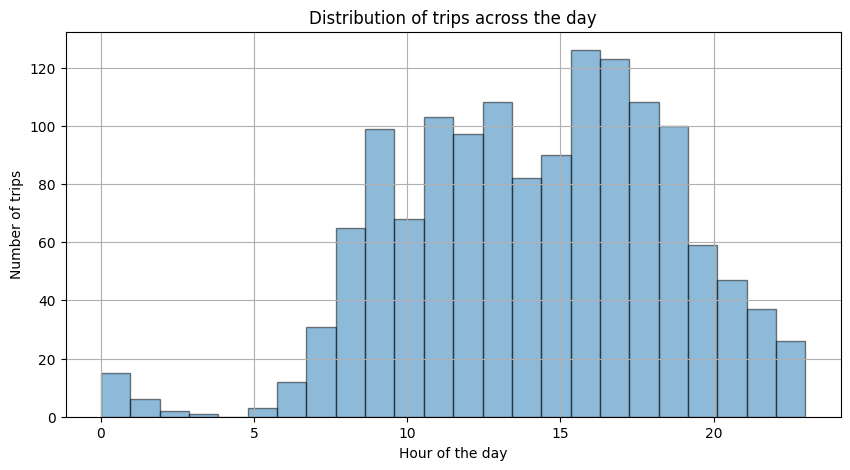

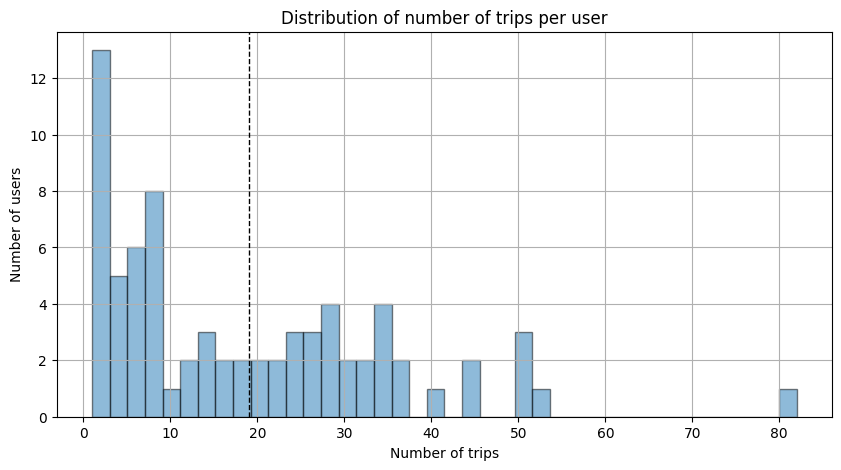

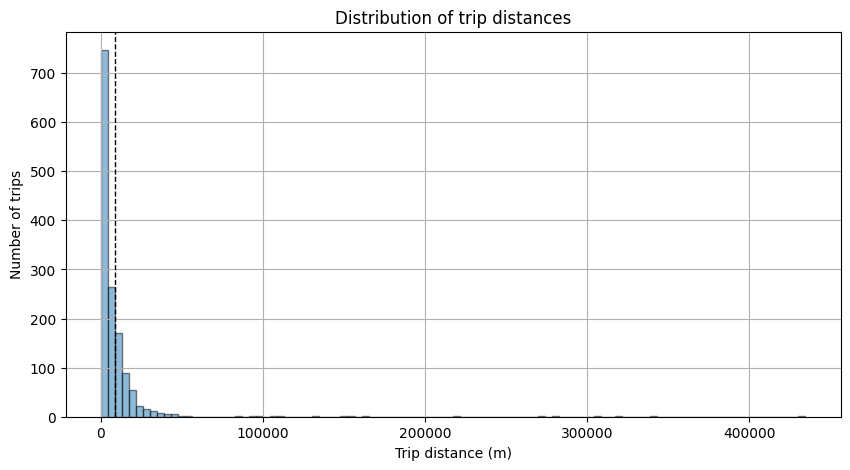

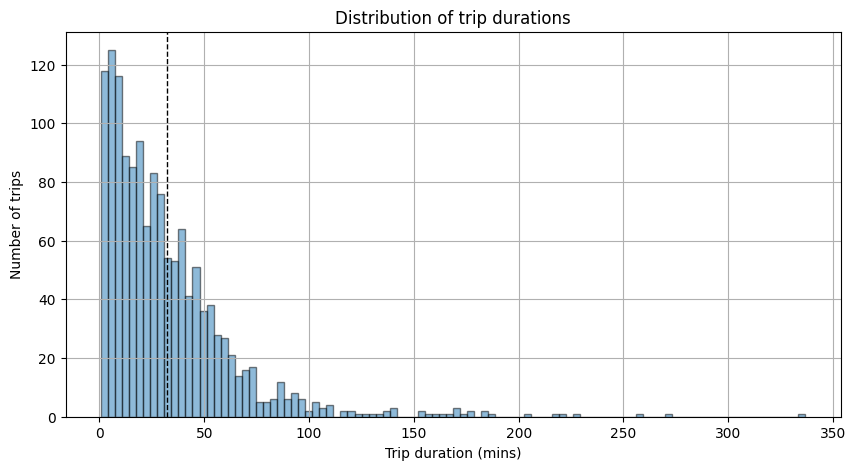


Matching start and end points with tessellation...
Done.

Extracting trips that start and end within tessellation area...
Number of trips that start and end wihin tessellation area: 1375
Number of trips outside and therefore dropped: 33
Done.

Building mapping of trip chains...


100%|███████████████████████████████████████████████████████████████████████████████| 1375/1375 [00:16<00:00, 82.74it/s]


Done.

Evaluating trip chaining...
Number of edges (matched) between trips: 476
Number of wrong matches: 20
Done.

Building trip chains...


100%|████████████████████████████████████████████████████████████████████████████| 1375/1375 [00:00<00:00, 27038.33it/s]


Done.

Merging trips...


100%|██████████████████████████████████████████████████████████████████████████████| 1375/1375 [00:12<00:00, 114.03it/s]


Done.
Number of trips that were matched at least once: 1358/1375
Concatenating MERGED and UNMERGED trips...
Done.

Extracting data for concatenated trips...
Done.

Building clustering after concatenation...
Number of unique clusters: 916
Done.

Building HL from start points...


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 81 disconnected components.
 There are 46 islands with ids: 1, 4, 5, 6, 24, 29, 33, 37, 38, 39, 40, 45, 46, 47, 48, 49, 57, 58, 59, 70, 84, 91, 92, 96, 98, 99, 102, 103, 113, 114, 115, 117, 118, 119, 120, 123, 137, 138, 158, 159, 178, 179, 182, 185, 186, 198.
  warnings.warn(message)


Done.

Building HL from end points...


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 124 disconnected components.
 There are 51 islands with ids: 4, 23, 37, 50, 51, 52, 53, 59, 60, 98, 115, 116, 126, 127, 129, 130, 132, 136, 148, 150, 156, 157, 158, 167, 199, 200, 203, 218, 225, 226, 239, 241, 244, 245, 262, 263, 269, 300, 302, 317, 318, 321, 329, 347, 355, 357, 387, 392, 406, 414, 422.
  warnings.warn(message)
/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 147 disconnected components.
 There are 59 islands with ids: 7, 68, 106, 144, 145, 147, 154, 155, 204, 238, 239, 246, 247, 259, 265, 273, 276, 291, 292, 295, 306, 313, 322, 323, 326, 337, 356, 357, 367, 368, 369, 370, 383, 390, 391, 408, 409, 420, 421, 437, 463, 468, 472, 474, 482, 484, 485, 497, 498, 531, 532, 537, 538, 543, 557, 564, 573, 592, 613.
  warnings.warn(message)


Done.

Combining HL from start points and end points...
Number of users for which at least on Home Location has been identified:  66
Number of unique HL tiles: 147
Done.

Matching trips to HL...
Number of unmatched trajectories (concatenated) that do neither start nor end in a HL tile: 87/916
Number of trajectories (concatenated) that start AND end in a HL tile: 487/916
Number of trips that match different HL tiles with their SP and EP: 240
Done.

Matching double assigned trips to unique HL...


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.
[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-4)]: Done 480 out of 480 | elapsed:  1.2min finished
[Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


All scores are 0.0, assigning -1 as best_hl_id!
All scores are 0.0, assigning -1 as best_hl_id!
Done.

Getting trajectories that happened during the same time...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-4)]: Done 550 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-4)]: Done 916 out of 916 | elapsed:  2.1min finished


Done.

Building clustering after HL matching step...


 11%|█████████▎                                                                        | 11/97 [00:00<00:00, 102.45it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 400 iterations with 109 trajectories...


[Parallel(n_jobs=-4)]: Done 400 out of 400 | elapsed:    0.6s finished
 29%|███████████████████████▉                                                           | 28/97 [00:00<00:02, 28.51it/s]

Done. Length of longest subset:  24


 41%|██████████████████████████████████▏                                                | 40/97 [00:01<00:01, 41.86it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 400 iterations with 46 trajectories...


[Parallel(n_jobs=-4)]: Done 400 out of 400 | elapsed:    0.5s finished
 58%|███████████████████████████████████████████████▉                                   | 56/97 [00:01<00:01, 32.90it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Done. Length of longest subset:  26
Running randomized subset search for 400 iterations with 44 trajectories...


[Parallel(n_jobs=-4)]: Done 400 out of 400 | elapsed:    0.5s finished
 72%|███████████████████████████████████████████████████████████▉                       | 70/97 [00:02<00:00, 27.47it/s]

Done. Length of longest subset:  34


100%|███████████████████████████████████████████████████████████████████████████████████| 97/97 [00:02<00:00, 34.66it/s]


Done.

Clustering results after concatenation step:
Number of unique clusters: 916
Homogeneity: 0.995
Completeness: 0.585
V-measure: 0.736
Rand index: 0.978
ARI: 0.058
MI: 3.911
NMI: 0.736
AMI: 0.263
Cluster accuracy: 0.145

Clustering results after HL matching step:
Number of unique clusters: 314
Homogeneity: 0.895
Completeness: 0.725
V-measure: 0.802
Rand index: 0.982
ARI: 0.494
MI: 3.522
NMI: 0.802
AMI: 0.663
Cluster accuracy: 0.556

Assigning trips without match...
Comparing trips that were not assigned to any HL_ID with trips that were assigned to a HL_ID...


  0%|                                                                                           | 0/219 [00:00<?, ?it/s]

There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 28.0, 108.0, 117.0, 132.0, 143.0]


  0%|▍                                                                                  | 1/219 [00:11<41:35, 11.45s/it]

Found best HL_ID after comparing candidates: -1.0
no match and assign new cluster id 315 to trips 89 159


  0%|▎                                                                                | 1/219 [00:30<1:52:34, 30.98s/it]


KeyboardInterrupt: 

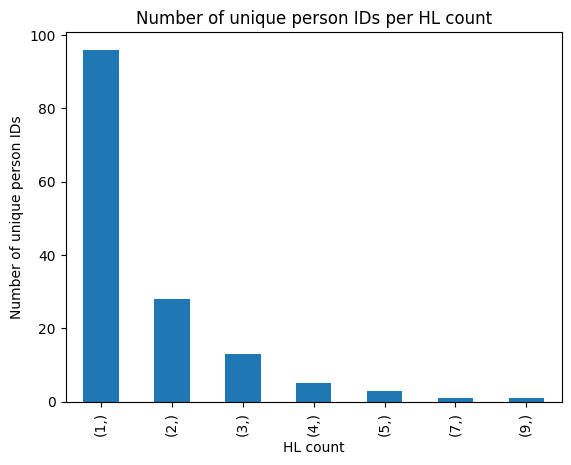

In [6]:
attack.run_full_attack(raw_full_trip_gdf, raw_trip_sp_gdf, raw_trip_ep_gdf, tesselation_gdf, city='berlin')